# Homework 2

## Pair Programming Group Number: HW 2 Group 1
## Members of Team: Pamela Nguyen and Daniel Carlson

#### Practicing using numpy to do math, and more visualizations

## DUE 15 Sept 2021 @ 11:59PM


More fun using the numerical package, numpy, a touch of pandas, and exercising your math vocabulary. 

In [1]:
# Your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://gist.githubusercontent.com/yanyanzheng96/8fe13cc4b7c6a1391d4841018340a627/raw/f17479a580783a810cfe119186e63b5b28a87b4c/melb_data.csv'
df = pd.read_csv(url)
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Question 1 - Discrete PDF
Create a vector of 1000 random numbers from a Normal distribution with mean 5 and standard deviation 10 and plot the discrete probability density function of that vector using a histogram.  You should use [numpy random normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to create the vector. Always label your axes and give your plots titles (this holds for all questions). 

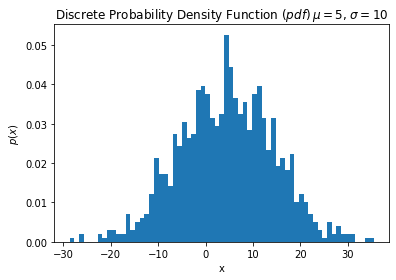

In [2]:
mu, sigma = 5, 10 #mean and standard deviation
pdf = np.random.normal(mu, sigma,1000)

# plot the discrete pdf using a histogram
count, bins, ignored = plt.hist(pdf, 65, density=True)
plt.title(r'Discrete Probability Density Function $(pdf)\/ \mu=5$, $\sigma=10$')
plt.xlabel('x')
plt.ylabel(r'$p(x)$')
plt.show()
plt.close()

## Question 2 - Discrete CDF

Create a discrete cumulative density function plot using the same vector as the last question using a line graph.
Annotate the point, $x$, where 80% of the data < $x$ and 20% of the data is greater than $x$.  You can use the matplotlib pyplot function [plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) to draw the line, and to draw a star at the point $x$.  Use the [legend](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html) function to annotate the graph. 

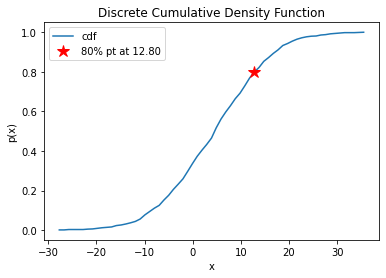

In [3]:
cdf = np.cumsum(count/sum(count))
plt.plot(bins[1:],cdf,label='cdf')
pt = bins[np.min(np.where(cdf>=0.8))]
pt_str = "{:.2f}".format(pt)
plt.plot(pt,0.8,'r*',markersize=12,label='80% pt at '+pt_str)
plt.title('Discrete Cumulative Density Function')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.show()
plt.close()

## Question 3 - Univariate Analysis

Load in the data from melb_data.csv into a pandas DataFrame.  Create a box and whisker graph comparing the prices in the suburbs:
  - Reservoir         
  - Richmond          
  - Bentleigh East
  
You should use the [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function, with the parameter `by`. 

Text(0, 0.5, 'Price')

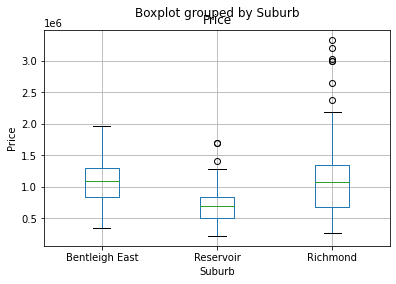

In [7]:
melbBox = df[(df['Suburb'] == 'Reservoir') | (df['Suburb'] == 'Richmond') | (df['Suburb'] == 'Bentleigh East')]
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
melbBox.boxplot(column='Price', by='Suburb')
plt.ylabel('Price')

## Question 4 - Rotation with Matrices

Consider the vectors:
  - $\alpha$ which begins at (0,0) and ends at (1,1)
  - $\beta$ which begins at (1,1) and ends at (0,1)
  
Draw $\alpha$ and $\beta$ using a line graph using a different color for each vector.

Now, using matrix multiplication rotate the vectors 45 degrees (clockwise or counter-clockwise, you choose!) and draw the result.  You must use numpy's [matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) to accomplish the rotation. Numpy also has functions for `sin` and `cos`.  You should also get [pi](https://numpy.org/doc/stable/reference/constants.html?highlight=pi#numpy.pi) from the numpy package. 

Text(0, 0.5, 'y(x)')

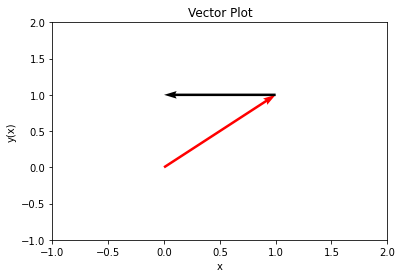

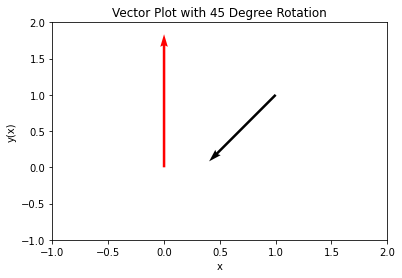

In [5]:
alpha = [[0,0], [1,1]]
beta = [[1,1], [0,1]]

x1 = np.array([alpha[0][0], beta[0][0]])
y1 = np.array([alpha[0][1], beta[0][1]])
x2 = np.array([alpha[1][0], beta[1][0]])
y2 = np.array([alpha[1][1], beta[1][1]])

plt.figure()
plt.quiver(x1[0], y1[0], x2[0]-x1[0], y2[0]-y1[0], angles='xy', scale_units='xy', scale=1,color='red')
plt.quiver(x1[1], y1[1], x2[1]-x1[1], y2[1]-y1[1], angles='xy', scale_units='xy', scale=1,color='black')
plt.title('Vector Plot')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.xlim(-1,2)
plt.ylim(-1,2)

theta = np.pi/4
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))
alphaRot = np.add(np.matmul(R, np.subtract(alpha[1], alpha[0])), alpha[0])
betaRot = np.add(np.matmul(R, np.subtract(beta[1], beta[0])), beta[0])

#print(alphaRot, betaRot)

x2R = np.array([alphaRot[0], betaRot[0]])
y2R = np.array([alphaRot[1], betaRot[1]])

plt.figure()
plt.quiver(x1[0], y1[0], x2R[0]-x1[0], y2R[0]-y1[0], scale=1, units='xy',color='red')
plt.quiver(x1[1], y1[1], x2R[1]-x1[1], y2R[1]-y1[1], scale=1, units='xy',color='black')
plt.title('Vector Plot with 45 Degree Rotation')
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.xlabel('x')
plt.ylabel('y(x)')

## Question 5 - Solving Systems of Equations with Matrices

Consider the following system of equations:
  - $2x +  y + z = 5$
  - $4x - 6y     = -2$
  - $-2x + 7y + 2z = 9$
  
Convert the coefficients of the system of equations to a matrix, $A$, where the first column contains the $x$ coefficients, the second column contains the $y$ coefficients, and the third column contains the $z$ coefficients. 
Covert the values on the right hand side to a (3,1) vector, $b$, (make sure you keep all the numbers in order.  Now, solve for $(x,y,z)$ by inverting $A$ and multiplying by $b$, eg, $A^{-1} * b$. 

Use the numpy [linear algebra inverse function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) to find $A^{-1}$.

In [6]:
A = [[2, 1, 1],
     [4, -6, 0],
     [-2, 7, 2]]
b = [[5], [-2], [9]]

Ainv = np.linalg.inv(A)
np.dot(Ainv,b)

array([[1.],
       [1.],
       [2.]])